In [40]:
import numpy as np
import pandas as pd

In [2]:
import sqlite3

In [39]:
import matplotlib.pyplot as py

In [4]:
path = "C:/Users/rfroo/"
database = path+'database.sqlite'

In [5]:
#Lets create a connection to DB and see the tables which we already have in this DB
conn = sqlite3.connect(database)

In [6]:
tables= pd.read_sql("Select * from sqlite_master where type='table';", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [7]:
master = pd.read_sql("select * from sqlite_master", conn)
master

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,index,sqlite_autoindex_Player_1,Player,15,None
4,index,sqlite_autoindex_Player_2,Player,17,None
5,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
6,index,sqlite_autoindex_Match_1,Match,19,None
7,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
8,index,sqlite_autoindex_League_1,League,25,None
9,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...


In [8]:
#Select list of countries
countries = pd.read_sql("Select * from country", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [9]:
#query the list of leagues and their countries
league = pd.read_sql("select * from league",conn)
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [10]:
league_nd_country = pd.read_sql("select l.name as league_name, c.name as country_name from league l, country c where l.country_id= c.id",conn)
league_nd_country

,league_name,country_name
0,Belgium Jupiler League,Belgium
1,England Premier League,England
2,France Ligue 1,France
3,Germany 1. Bundesliga,Germany
4,Italy Serie A,Italy
5,Netherlands Eredivisie,Netherlands
6,Poland Ekstraklasa,Poland
7,Portugal Liga ZON Sagres,Portugal
8,Scotland Premier League,Scotland
9,Spain LIGA BBVA,Spain


In [11]:
"""
List of leagues and their country
I will use join in this case
Inner Join - keep only records that match the condition (after the ON) in both the tables,
and records in both tables that do not match wouldn't appear in the output
LEFT JOIN - keep all the values from the first left table - in conjunction with the matching 
rows from the right table. The columns from the right table, that don't have matching value in the left,
would have NULL values.

"""

"\nList of leagues and their country\nI will use join in this case\nInner Join - keep only records that match the condition (after the ON) in both the tables,\nand records in both tables that do not match wouldn't appear in the output\nLEFT JOIN - keep all the values from the first left table - in conjunction with the matching \nrows from the right table. The columns from the right table, that don't have matching value in the left,\nwould have NULL values.\n\n"

In [12]:
league= pd.read_sql("select * from league join country on country.id=league.country_id;",conn)
league

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [13]:
#Query the list of teams
teams= pd.read_sql("select * from team order by team_api_id asc limit 5 ",conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,31446,1601,874,Ruch Chorzów,CHO
1,1513,1773,100087,Oud-Heverlee Leuven,O-H
2,31456,1957,110745,Jagiellonia Białystok,BIA
3,35774,2033,111540,S.C. Olhanense,OLH
4,31453,2182,873,Lech Poznań,POZ


In [14]:
tables= pd.read_sql("Select * from sqlite_master where type='table';", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [35]:
#Query the list of matches
match = pd.read_sql("select * from match order by date ASC limit 10", conn)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,24559,24558,24558,2008/2009,1,2008-07-18 00:00:00,486263,10192,9931,1,...,None,None,None,None,None,None,None,None,None,None
1,24560,24558,24558,2008/2009,1,2008-07-19 00:00:00,486264,9930,10179,3,...,None,None,None,None,None,None,None,None,None,None
2,24561,24558,24558,2008/2009,1,2008-07-20 00:00:00,486265,10199,9824,1,...,None,None,None,None,None,None,None,None,None,None
3,24562,24558,24558,2008/2009,1,2008-07-20 00:00:00,486266,7955,10243,1,...,None,None,None,None,None,None,None,None,None,None
4,24613,24558,24558,2008/2009,2,2008-07-23 00:00:00,486267,9931,9956,1,...,None,None,None,None,None,None,None,None,None,None
5,24614,24558,24558,2008/2009,2,2008-07-23 00:00:00,486268,6493,7955,1,...,None,None,None,None,None,None,None,None,None,None
6,24615,24558,24558,2008/2009,2,2008-07-23 00:00:00,486269,10243,10199,1,...,None,None,None,None,None,None,None,None,None,None
7,24616,24558,24558,2008/2009,2,2008-07-24 00:00:00,486270,10179,10192,2,...,None,None,None,None,None,None,None,None,None,None
8,24617,24558,24558,2008/2009,2,2008-07-24 00:00:00,486271,9824,9930,0,...,None,None,None,None,None,None,None,None,None,None
9,24668,24558,24558,2008/2009,3,2008-07-26 00:00:00,486272,9931,6493,2,...,None,None,None,None,None,None,None,None,None,None


In [25]:
#lets query the detail sof the matches
detailed_matches = pd.read_sql("""select match.id,   
                                         country.name as country_name,
                                         league.name as league_name,
                                         season,
                                         stage,
                                         date,
                                         HT.team_long_name as home_team,
                                         AT.team_long_name as away_team,
                                         home_team_goal,
                                         away_team_goal 
                                from match
                                join country on country.id = match.country_id
                                join league on league.id = match.league_id
                                left join team as HT on HT.team_api_id= match.home_team_api_id
                                left join team as AT on AT.team_api_id = match.away_team_api_id
                                where country_name="England" 
                                ORDER by date limit 10;""", conn)
detailed_matches
                               

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,1730,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Arsenal,West Bromwich Albion,1,0
1,1731,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Sunderland,Liverpool,0,1
2,1732,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,West Ham United,Wigan Athletic,2,1
3,1734,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Everton,Blackburn Rovers,2,3
4,1735,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Middlesbrough,Tottenham Hotspur,2,1
5,1736,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Bolton Wanderers,Stoke City,3,1
6,1737,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Hull City,Fulham,2,1
7,1729,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Manchester United,Newcastle United,1,1
8,1733,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Aston Villa,Manchester City,4,2
9,1738,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Chelsea,Portsmouth,4,0


In [33]:
#Lets do some data analysis
leagues_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Germany', 'France', 'Italy','Spain', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leagues_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


In [31]:
df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), columns=leagues_by_season['country_name'].unique())

In [32]:
df

,France,Germany,Italy
2008/2009,NaN,NaN,NaN
2009/2010,NaN,NaN,NaN
2010/2011,NaN,NaN,NaN
2011/2012,NaN,NaN,NaN
2012/2013,NaN,NaN,NaN
2013/2014,NaN,NaN,NaN
2014/2015,NaN,NaN,NaN
2015/2016,NaN,NaN,NaN


In [35]:
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany','avg_goals'])


In [37]:
df.loc[:,'Spain']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']  = list(leagues_by_season.loc[leagues_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='England','avg_goals'])

<AxesSubplot:title={'center':'Average goals per game over time'}>

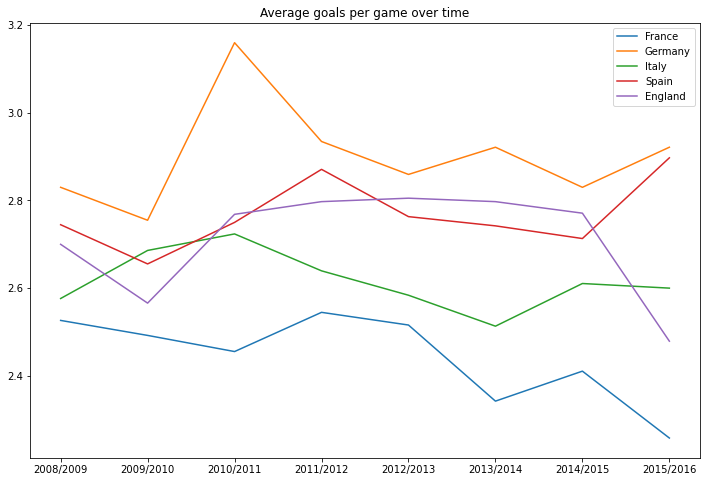

In [42]:
df.plot(figsize=(12,8), title='Average goals per game over time')

In [43]:
df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), columns=leagues_by_season['country_name'].unique())

<AxesSubplot:title={'center':'Average Goals Difference Home vs Out'}>

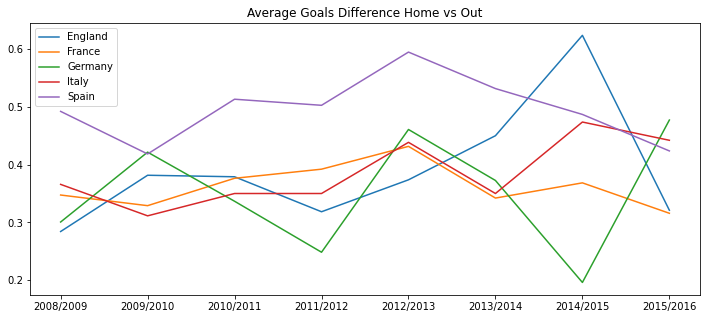

In [44]:
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'Spain']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_goal_dif'])
df.loc[:,'France']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='France','avg_goal_dif'])
df.loc[:,'Italy']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Italy','avg_goal_dif'])
df.loc[:,'England']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='England','avg_goal_dif'])
df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

In [45]:
"""
Conditional function is an important tool for data manipulation. 
IF statement is very popular in other languages, SQLite doesn't support it,
and it's implemented using CASE + WHEN + ELSE statement.
"""

"\nConditional function is an important tool for data manipulation. \nIF statement is very popular in other languages, SQLite doesn't support it,\nand it's implemented using CASE + WHEN + ELSE statement.\n"

In [52]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)

In [53]:
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


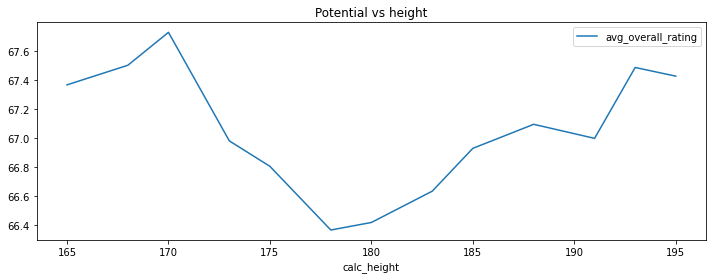

In [61]:
players_height.plot(x='calc_height', y='avg_overall_rating', figsize=(12,4), title='Potential vs height');